In [5]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

# 전항지 출항 확인

전항지 출항 지점 확인

In [6]:
import os
 
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [51]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [103]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'AKA_BHUM_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

COSCO_FOS_voyages_list = [
    'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
    'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
    'COSCO_FOS_VRKR6_2022_26processed', 'COSCO_FOS_VRKR6_2022_27processed',
    'COSCO_FOS_VRKR6_2022_28processed', 'COSCO_FOS_VRKR6_2022_29processed',
    'COSCO_FOS_VRKR6_2022_30processed'
]

AKA_BHUM_voyages_list = [
    'AKA_BHUM_9V7282_2022_7processed', 'AKA_BHUM_9V7282_2022_8processed'
]
OOCL_NEW_YORK_voyages_list = [
    'OOCL_NEW_YORK_VRJS2_2022_1processed',
    'OOCL_NEW_YORK_VRJS2_2022_2processed',
    'OOCL_NEW_YORK_VRJS2_2022_3processed'
]

OOCL_LUXEMBOURG_voyages_list = [
    'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
    'OOCL_LUXEMBOURG_VRGO3_2022_6processed'
]

OOCL_GENOA_voyages_list = [
    'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
]

OOCL_HAMBURG_voyages_list = [
    'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

SEAMAX_STRATFORD_voyages_list = [
    'SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed'
]

ZIM_CHARLESTORN_voyages_list = [
    'ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed'
]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed'
]

In [104]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

# Tianjin to Busan PNIT

## COSCO_FOS

In [451]:
coordinates_array = pd.DataFrame(data={"latitude" : [],"longitude" : []})

for i in COSCO_FOS_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    coordinates_array = coordinates_array.append(df[["latitude","longitude"]], ignore_index=True)

In [452]:
import matplotlib.pyplot as plt
import seaborn as sns

In [453]:
from shapely.geometry import LineString

In [454]:
from scipy import interpolate
import pandas as pd

In [455]:
data

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,timestamp_seconds
0,283,COSCO FOS,477947700,9484302.0,4253,CNTXG,12200930,117.7980,38.9701,11.9,102.0,2022-12-22 13:36:32.177318,2022-12-22 04:36:02.000000,2022-12-22 02:01:05.000000,moored,1074.463522,58.783608,1.671716e+09
1,284,COSCO FOS,477947700,9484302.0,4253,CNTXG,12200930,117.8200,38.9668,12.4,100.0,2022-12-22 13:41:32.267747,2022-12-22 04:41:11.000000,2022-12-22 02:01:05.000000,under way using engine,1072.556704,59.934613,1.671716e+09
2,285,COSCO FOS,477947700,9484302.0,4253,KRBNP,12250200,117.8643,38.9598,12.8,102.0,2022-12-22 13:51:33.638892,2022-12-22 04:51:01.000000,2022-12-22 04:49:10.000000,under way using engine,1068.703159,60.860384,1.671717e+09
3,286,COSCO FOS,477947700,9484302.0,4253,KRBNP,12250200,117.9113,38.9524,12.5,101.0,2022-12-22 14:06:35.614932,2022-12-22 05:01:49.000000,2022-12-22 04:49:10.000000,under way using engine,1064.616216,59.763693,1.671718e+09
4,287,COSCO FOS,477947700,9484302.0,4253,KRBNP,12250200,117.9337,38.9490,13.0,100.0,2022-12-22 14:11:38.306936,2022-12-22 05:06:42.000000,2022-12-22 04:49:10.000000,under way using engine,1062.673652,61.129006,1.671718e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,889,COSCO FOS,477947700,9484302.0,4253,KRBNP,12260200,128.8558,34.8888,6.1,351.0,2022-12-26 10:53:59.091172,2022-12-26 01:50:45.000000,2022-12-26 01:36:28.000000,under way using engine,9.576210,0.589294,1.672052e+09
351,890,COSCO FOS,477947700,9484302.0,4253,KRBNP,12260200,128.8541,34.8952,6.2,350.0,2022-12-26 10:59:00.169339,2022-12-26 01:54:40.000000,2022-12-26 01:54:34.000000,under way using engine,8.855430,0.539214,1.672052e+09
352,891,COSCO FOS,477947700,9484302.0,4253,KRBNP,12260200,128.8477,34.9145,6.4,342.0,2022-12-26 11:09:01.777127,2022-12-26 02:05:55.000000,2022-12-26 01:54:34.000000,under way using engine,6.645965,0.396707,1.672053e+09
353,892,COSCO FOS,477947700,9484302.0,4253,KRBNP,12260200,128.8438,34.9229,6.4,338.0,2022-12-26 11:14:02.338182,2022-12-26 02:11:00.000000,2022-12-26 01:54:34.000000,under way using engine,5.647210,0.337090,1.672053e+09


In [456]:
data[data["speed"] >= 3]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,timestamp_seconds
0,283,COSCO FOS,477947700,9484302.0,4253,CNTXG,12200930,117.7980,38.9701,11.9,102.0,2022-12-22 13:36:32.177318,2022-12-22 04:36:02.000000,2022-12-22 02:01:05.000000,moored,1074.463522,58.783608,1.671716e+09
1,284,COSCO FOS,477947700,9484302.0,4253,CNTXG,12200930,117.8200,38.9668,12.4,100.0,2022-12-22 13:41:32.267747,2022-12-22 04:41:11.000000,2022-12-22 02:01:05.000000,under way using engine,1072.556704,59.934613,1.671716e+09
2,285,COSCO FOS,477947700,9484302.0,4253,KRBNP,12250200,117.8643,38.9598,12.8,102.0,2022-12-22 13:51:33.638892,2022-12-22 04:51:01.000000,2022-12-22 04:49:10.000000,under way using engine,1068.703159,60.860384,1.671717e+09
3,286,COSCO FOS,477947700,9484302.0,4253,KRBNP,12250200,117.9113,38.9524,12.5,101.0,2022-12-22 14:06:35.614932,2022-12-22 05:01:49.000000,2022-12-22 04:49:10.000000,under way using engine,1064.616216,59.763693,1.671718e+09
4,287,COSCO FOS,477947700,9484302.0,4253,KRBNP,12250200,117.9337,38.9490,13.0,100.0,2022-12-22 14:11:38.306936,2022-12-22 05:06:42.000000,2022-12-22 04:49:10.000000,under way using engine,1062.673652,61.129006,1.671718e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,889,COSCO FOS,477947700,9484302.0,4253,KRBNP,12260200,128.8558,34.8888,6.1,351.0,2022-12-26 10:53:59.091172,2022-12-26 01:50:45.000000,2022-12-26 01:36:28.000000,under way using engine,9.576210,0.589294,1.672052e+09
351,890,COSCO FOS,477947700,9484302.0,4253,KRBNP,12260200,128.8541,34.8952,6.2,350.0,2022-12-26 10:59:00.169339,2022-12-26 01:54:40.000000,2022-12-26 01:54:34.000000,under way using engine,8.855430,0.539214,1.672052e+09
352,891,COSCO FOS,477947700,9484302.0,4253,KRBNP,12260200,128.8477,34.9145,6.4,342.0,2022-12-26 11:09:01.777127,2022-12-26 02:05:55.000000,2022-12-26 01:54:34.000000,under way using engine,6.645965,0.396707,1.672053e+09
353,892,COSCO FOS,477947700,9484302.0,4253,KRBNP,12260200,128.8438,34.9229,6.4,338.0,2022-12-26 11:14:02.338182,2022-12-26 02:11:00.000000,2022-12-26 01:54:34.000000,under way using engine,5.647210,0.337090,1.672053e+09


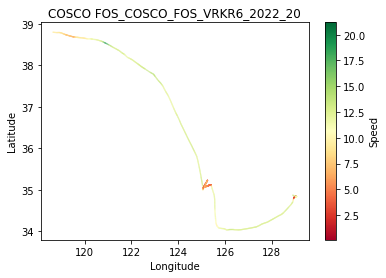

보간법 전 일반 평균 속도 : 10.84341085271318
보간법 전 일반 속도 표준편차: 2.994517557558759
보간법 전 저속 제거 평균 속도 : 10.84341085271318
보간법 전 저속 제거 속도 표준편차: 2.994517557558759
-
보간법 후 일반 평균 속도 : 9.504384275133198
보간법 후 일반 속도 표준편차: 3.38464396887107
보간법 후 저속 제거 평균 속도 : 9.504384275133198
보간법 후 저속 제거 속도 표준편차: 3.38464396887107


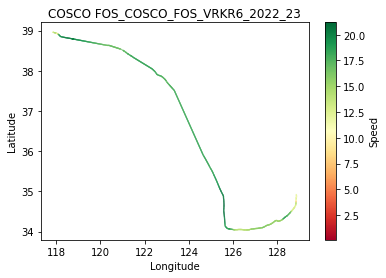

보간법 전 일반 평균 속도 : 16.75807860262009
보간법 전 일반 속도 표준편차: 2.649105009334675
보간법 전 저속 제거 평균 속도 : 16.75807860262009
보간법 전 저속 제거 속도 표준편차: 2.649105009334675
-
보간법 후 일반 평균 속도 : 17.236317104560104
보간법 후 일반 속도 표준편차: 2.227323542773959
보간법 후 저속 제거 평균 속도 : 17.236317104560104
보간법 후 저속 제거 속도 표준편차: 2.227323542773959


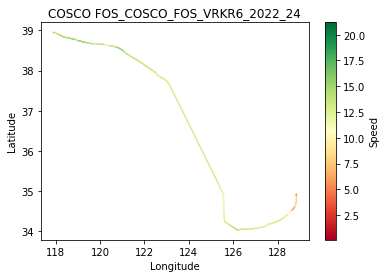

보간법 전 일반 평균 속도 : 12.309897610921503
보간법 전 일반 속도 표준편차: 1.9405006816493167
보간법 전 저속 제거 평균 속도 : 12.309897610921503
보간법 전 저속 제거 속도 표준편차: 1.9405006816493167
-
보간법 후 일반 평균 속도 : 12.660684780696224
보간법 후 일반 속도 표준편차: 1.7223205092593743
보간법 후 저속 제거 평균 속도 : 12.660684780696224
보간법 후 저속 제거 속도 표준편차: 1.7223205092593743


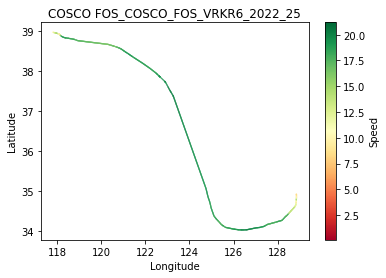

보간법 전 일반 평균 속도 : 17.315503875968993
보간법 전 일반 속도 표준편차: 2.7140332760836965
보간법 전 저속 제거 평균 속도 : 17.315503875968993
보간법 전 저속 제거 속도 표준편차: 2.7140332760836965
-
보간법 후 일반 평균 속도 : 17.84098496809962
보간법 후 일반 속도 표준편차: 2.336286654553293
보간법 후 저속 제거 평균 속도 : 17.84098496809962
보간법 후 저속 제거 속도 표준편차: 2.336286654553293


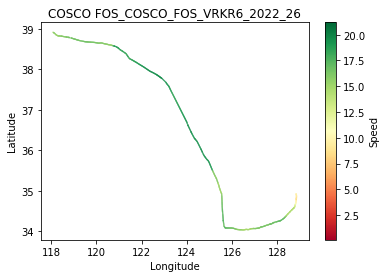

보간법 전 일반 평균 속도 : 16.46241379310345
보간법 전 일반 속도 표준편차: 1.9907734589655557
보간법 전 저속 제거 평균 속도 : 16.46241379310345
보간법 전 저속 제거 속도 표준편차: 1.9907734589655557
-
보간법 후 일반 평균 속도 : 16.837835871206657
보간법 후 일반 속도 표준편차: 2.2246211925695936
보간법 후 저속 제거 평균 속도 : 16.837835871206657
보간법 후 저속 제거 속도 표준편차: 2.2246211925695936


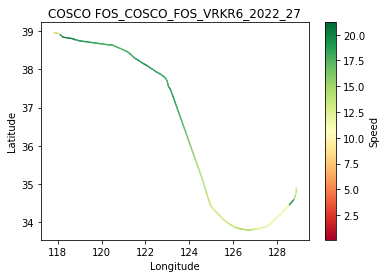

보간법 전 일반 평균 속도 : 14.273705179282867
보간법 전 일반 속도 표준편차: 3.0860761197243773
보간법 전 저속 제거 평균 속도 : 14.273705179282867
보간법 전 저속 제거 속도 표준편차: 3.0860761197243773
-
보간법 후 일반 평균 속도 : 15.558482547231597
보간법 후 일반 속도 표준편차: 2.9965360193683765
보간법 후 저속 제거 평균 속도 : 15.558482547231597
보간법 후 저속 제거 속도 표준편차: 2.9965360193683765


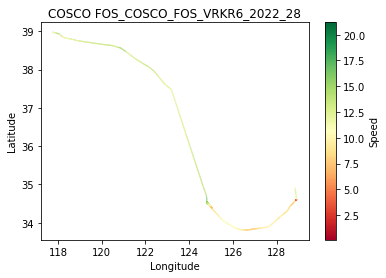

보간법 전 일반 평균 속도 : 10.858545454545455
보간법 전 일반 속도 표준편차: 2.3006087881871635
보간법 전 저속 제거 평균 속도 : 10.858545454545455
보간법 전 저속 제거 속도 표준편차: 2.3006087881871635
-
보간법 후 일반 평균 속도 : 11.190793096599755
보간법 후 일반 속도 표준편차: 2.717573355329743
보간법 후 저속 제거 평균 속도 : 11.190793096599755
보간법 후 저속 제거 속도 표준편차: 2.717573355329743


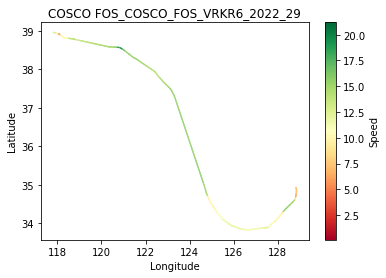

보간법 전 일반 평균 속도 : 11.938951310861425
보간법 전 일반 속도 표준편차: 2.695788212023827
보간법 전 저속 제거 평균 속도 : 11.938951310861425
보간법 전 저속 제거 속도 표준편차: 2.695788212023827
-
보간법 후 일반 평균 속도 : 12.979532855823654
보간법 후 일반 속도 표준편차: 2.550229317778519
보간법 후 저속 제거 평균 속도 : 12.979532855823654
보간법 후 저속 제거 속도 표준편차: 2.550229317778519


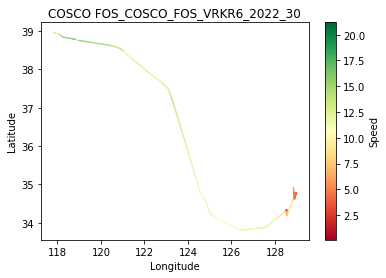

보간법 전 일반 평균 속도 : 10.505362776025237
보간법 전 일반 속도 표준편차: 2.8900094626015407
보간법 전 저속 제거 평균 속도 : 10.505362776025237
보간법 전 저속 제거 속도 표준편차: 2.8900094626015407
-
보간법 후 일반 평균 속도 : 9.613927595977106
보간법 후 일반 속도 표준편차: 3.6497427225278494
보간법 후 저속 제거 평균 속도 : 9.613927595977106
보간법 후 저속 제거 속도 표준편차: 3.6497427225278494


In [457]:
max_speed_list = []
min_speed_list = []
for i in COSCO_FOS_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in COSCO_FOS_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
#     min_speed = data["speed"].min()
#     max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=1000)

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

    # Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

        # Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

- 속도가 저속(3노트 이하)인 경우는 어떻게 계산할 것인가?
- segment를 나눠서 해야 하나? 전체 평균 속도로 전체 계산을 하면 너무 차이가 클 것 같다.

In [458]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['COSCO_FOS_VRKR6_2022_20',
 'COSCO_FOS_VRKR6_2022_24',
 'COSCO_FOS_VRKR6_2022_28',
 'COSCO_FOS_VRKR6_2022_29',
 'COSCO_FOS_VRKR6_2022_30']

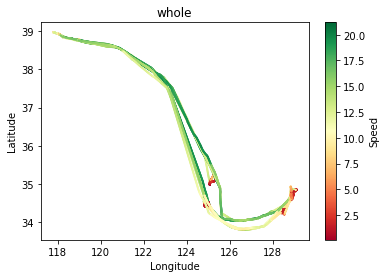

In [459]:
max_speed_list = []
min_speed_list = []
for i in COSCO_FOS_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

fig, ax = plt.subplots()

for i in COSCO_FOS_voyages_list:
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
#     min_speed = data["speed"].min()
#     max_speed = data["speed"].max()


    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=1000)

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     plt.hold(False)

    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=1)

    # Add axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('whole')
# Add a colorbar
cbar = plt.colorbar(sc,label='Speed')

    # Show the plot
plt.show()

In [460]:
COSCO_FOS_voyages_list

['COSCO_FOS_VRKR6_2022_20processed',
 'COSCO_FOS_VRKR6_2022_23processed',
 'COSCO_FOS_VRKR6_2022_24processed',
 'COSCO_FOS_VRKR6_2022_25processed',
 'COSCO_FOS_VRKR6_2022_26processed',
 'COSCO_FOS_VRKR6_2022_27processed',
 'COSCO_FOS_VRKR6_2022_28processed',
 'COSCO_FOS_VRKR6_2022_29processed',
 'COSCO_FOS_VRKR6_2022_30processed']

In [461]:
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['COSCO_FOS_VRKR6_2022_20',
 'COSCO_FOS_VRKR6_2022_24',
 'COSCO_FOS_VRKR6_2022_28',
 'COSCO_FOS_VRKR6_2022_29',
 'COSCO_FOS_VRKR6_2022_30']

In [462]:
high_speed_path_data =[]
low_speed_path_data =[]

for i in COSCO_FOS_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + 'processed_below_3knot'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + 'processed_below_3knot'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

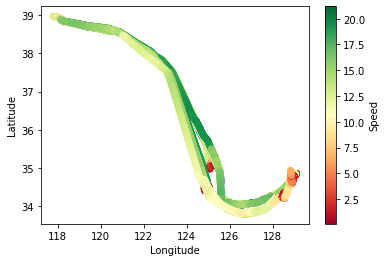

In [463]:
# Concatenate all the paths data
all_data = pd.concat(path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))

# Group the data by the index and calculate the mean of each feature
mean_data = all_data.groupby('index').mean()

# Reset the index
mean_data.reset_index(inplace=True)

# Plot the representative path
plt.scatter(mean_data['longitude'], mean_data['latitude'], c = mean_data['speed'], cmap = cmap, norm = norm)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Speed')
plt.show()

In [464]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))

In [465]:
all_data["index"] = all_data.index

In [466]:
concaternated_df = all_data.groupby('index').mean()
concaternated_df

,timestamp,longitude,latitude,speed
index,,,,
0,1.668974e+09,117.979120,38.933880,10.280000
1,1.668974e+09,117.999042,38.931411,11.284773
2,1.668974e+09,118.020469,38.928701,11.845322
3,1.668974e+09,118.041947,38.925976,12.270379
4,1.668975e+09,118.062697,38.923408,12.495747
...,...,...,...,...
995,1.669261e+09,128.885421,34.876251,8.563510
996,1.669261e+09,128.877529,34.885725,8.696599
997,1.669261e+09,128.869482,34.895010,8.792156


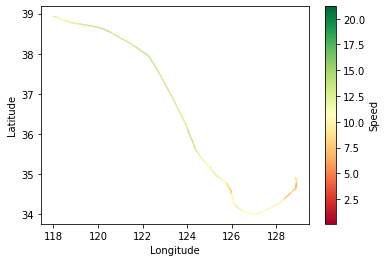

In [467]:
plt.scatter(concaternated_df['longitude'], concaternated_df['latitude'], c = concaternated_df['speed'], cmap = cmap, norm = norm,s=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Speed')
plt.show()

In [468]:
concaternated_df.to_csv("실험/upper_china_cosco_fos_low_speed_below_3_knot_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [469]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))

In [470]:
all_data["index"] = all_data.index

In [471]:
concaternated_df = all_data.groupby('index').mean()
concaternated_df

,timestamp,longitude,latitude,speed
index,,,,
0,1.668396e+09,117.884550,38.953275,11.650000
1,1.668396e+09,117.897160,38.950401,12.233288
2,1.668396e+09,117.909588,38.947581,12.769996
3,1.668396e+09,117.919868,38.945313,12.914693
4,1.668396e+09,117.930111,38.943053,13.054118
...,...,...,...,...
995,1.668546e+09,128.857926,34.886334,11.051028
996,1.668546e+09,128.855673,34.894031,10.892777
997,1.668547e+09,128.852806,34.902800,10.665128


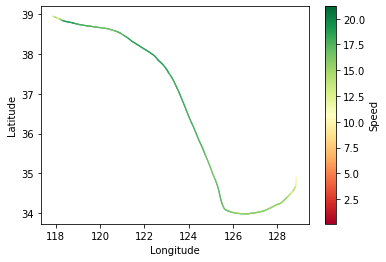

In [472]:
plt.scatter(concaternated_df['longitude'], concaternated_df['latitude'], c = concaternated_df['speed'], cmap = cmap, norm = norm,s=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Speed')
plt.show()

In [473]:
concaternated_df.to_csv("실험/upper_china_cosco_fos_high_speed_below_3_knot_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

# ETA 실험

In [474]:
high_speed_interpolated_df = pd.read_csv("실험/upper_china_cosco_fos_high_speed_below_3_knot_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.668396e+09,117.884550,38.953275,11.650000
1,1.668396e+09,117.897160,38.950401,12.233288
2,1.668396e+09,117.909588,38.947581,12.769996
3,1.668396e+09,117.919868,38.945313,12.914693
4,1.668396e+09,117.930111,38.943053,13.054118
...,...,...,...,...
995,1.668546e+09,128.857926,34.886334,11.051028
996,1.668546e+09,128.855673,34.894031,10.892777
997,1.668547e+09,128.852806,34.902800,10.665128
998,1.668547e+09,128.849934,34.911031,10.607361


In [475]:
low_speed_interpolated_df = pd.read_csv("실험/upper_china_cosco_fos_low_speed_below_3_knot_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.668974e+09,117.979120,38.933880,10.280000
1,1.668974e+09,117.999042,38.931411,11.284773
2,1.668974e+09,118.020469,38.928701,11.845322
3,1.668974e+09,118.041947,38.925976,12.270379
4,1.668975e+09,118.062697,38.923408,12.495747
...,...,...,...,...
995,1.669261e+09,128.885421,34.876251,8.563510
996,1.669261e+09,128.877529,34.885725,8.696599
997,1.669261e+09,128.869482,34.895010,8.792156
998,1.669262e+09,128.861242,34.904517,8.863743


In [489]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 고속

### segment

In [492]:
seg_length = int(len(high_speed_interpolated_df) / 20)

In [493]:
high_speed_df_list = []
for i in range(20):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [494]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

15.35415070606337
18.383626575251213
17.479411749221843
16.890482616810228
18.130500958188044
18.80074640521293
18.74241340272675
18.586008150738238
18.490051795097465
18.210547681122748
17.835824959071076
16.91586286776801
16.92227003577601
17.20871158500804
16.018116712330006
15.640849613397915
15.717468900880785
15.37728199962975
14.451187803697112
12.212587937498352


In [495]:
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.668396e+09,117.884550,38.953275,11.650000
1,1.668396e+09,117.897160,38.950401,12.233288
2,1.668396e+09,117.909588,38.947581,12.769996
3,1.668396e+09,117.919868,38.945313,12.914693
4,1.668396e+09,117.930111,38.943053,13.054118
...,...,...,...,...
995,1.668546e+09,128.857926,34.886334,11.051028
996,1.668546e+09,128.855673,34.894031,10.892777
997,1.668547e+09,128.852806,34.902800,10.665128
998,1.668547e+09,128.849934,34.911031,10.607361


### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [548]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [549]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df):
    seg_no = optimal_point_idx // (len(path_df) / 20)
    next_no = (optimal_point_idx + 1) // (len(path_df) / 20)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [550]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [551]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - hour) * 60)
    second = ((distance / km_h - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

In [552]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

In [553]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 06:49:11.404368
평균: 0 days 02:43:00.801063618


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [554]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [555]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

In [556]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 06:49:11.404368
평균: 0 days 02:43:00.801063618


In [557]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
35,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.4699,38.6184,15.9,103.0,2022-11-20 06:29:16.324155,2022-11-19 21:28:52,2022-11-19 09:25:09,under way using engine,846.479135,1395.746384,2022-11-21 07:31:14.870005,2022-11-21 07:29:14,0 days 00:02:00.870005
34,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.4380,38.6231,15.9,100.0,2022-11-20 06:24:13.396141,2022-11-19 21:22:57,2022-11-19 06:37:05,under way using engine,849.198642,1400.230537,2022-11-21 07:25:19.870005,2022-11-21 07:29:14,0 days 00:03:54.129995
27,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 07:24:44.711282,2022-11-21 07:29:14,0 days 00:04:29.288718
33,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.3539,38.6318,15.9,92.0,2022-11-20 06:09:04.892370,2022-11-19 21:07:51,2022-11-19 06:37:05,under way using engine,856.193143,1411.763663,2022-11-21 07:10:13.870005,2022-11-21 07:29:14,0 days 00:19:00.129995
18,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,119.2443,38.7109,16.5,100.0,2022-11-20 03:02:19.742881,2022-11-19 17:54:44,2022-11-19 04:07:08,under way using engine,947.543060,1628.673936,2022-11-21 06:59:16.501585,2022-11-21 07:29:14,0 days 00:29:57.498415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,NaT,2022-11-21 07:29:14,NaT
286,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,NaT,2022-11-21 07:29:14,NaT
287,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,NaT,2022-11-21 07:29:14,NaT
288,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8493,34.8922,9.4,340.0,2022-11-21 16:35:01.296680,2022-11-21 07:14:04,2022-11-21 07:13:06,under way using engine,9.026448,11.280878,NaT,2022-11-21 07:29:14,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [558]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [559]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

In [560]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:22:15.970335
평균: 0 days 01:38:28.412887029


In [561]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
208,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.9330,34.0703,15.2,87.0,2022-11-21 08:13:44.474430,2022-11-20 23:13:21,2022-11-20 02:37:09,under way using engine,199.668752,314.123036,2022-11-21 07:11:29.476997,2022-11-21 07:29:14,0 days 00:17:44.523003
232,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.5659,34.1570,16.3,80.0,2022-11-21 10:14:55.789365,2022-11-21 01:12:41,2022-11-21 12:55:07,under way using engine,146.080952,247.608469,2022-11-21 07:09:06.720611,2022-11-21 07:29:14,0 days 00:20:07.279389
184,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.3060,34.0435,15.5,90.0,2022-11-21 06:07:33.845641,2022-11-20 21:07:10,2022-11-20 02:37:09,under way using engine,252.274122,404.861637,2022-11-21 07:08:44.962692,2022-11-21 07:29:14,0 days 00:20:29.037308
168,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.6657,34.1118,17.3,130.0,2022-11-21 04:06:25.860131,2022-11-20 19:05:34,2022-11-20 02:37:09,under way using engine,304.187718,553.366792,2022-11-21 07:07:19.304690,2022-11-21 07:29:14,0 days 00:21:54.695310
207,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.9076,34.0692,15.2,87.0,2022-11-21 08:08:41.839945,2022-11-20 23:08:20,2022-11-20 02:37:09,under way using engine,201.747847,317.393911,2022-11-21 07:06:28.476997,2022-11-21 07:29:14,0 days 00:22:45.523003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.0773,38.9155,14.7,115.0,2022-11-19 23:25:17.670300,2022-11-19 14:21:02,2022-11-19 02:19:09,under way using engine,1049.748068,1599.023661,2022-11-21 04:32:25.380900,2022-11-21 07:29:14,0 days 02:56:48.619100
19,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,119.3940,38.6930,16.5,98.0,2022-11-20 03:22:31.247286,2022-11-19 18:20:35,2022-11-19 04:07:08,under way using engine,934.820885,1606.806565,2022-11-21 04:31:30.883274,2022-11-21 07:29:14,0 days 02:57:43.116726
28,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.0900,38.6471,16.2,97.0,2022-11-20 05:23:39.178122,2022-11-19 20:20:32,2022-11-19 06:37:05,under way using engine,877.622646,1477.288557,2022-11-21 04:29:17.408257,2022-11-21 07:29:14,0 days 02:59:56.591743
10,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.6517,38.7994,16.1,97.0,2022-11-20 01:11:17.023334,2022-11-19 16:10:47,2022-11-19 04:07:08,under way using engine,998.767006,1669.627419,2022-11-21 04:25:43.029665,2022-11-21 07:29:14,0 days 03:03:30.970335


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [562]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [563]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

In [564]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:38:53.416000
평균: 0 days 01:17:46.541242422


In [565]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
193,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.5608,34.0428,14.8,85.0,2022-11-21 06:58:02.035219,2022-11-20 21:57:17,2022-11-20 02:37:09,under way using engine,231.194151,354.411913,2022-11-21 07:28:42.757505,2022-11-21 07:29:14,0 days 00:00:31.242495
152,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5689,34.5804,16.9,177.0,2022-11-21 02:25:28.882973,2022-11-20 17:24:59,2022-11-20 02:37:09,under way using engine,300.013822,530.427432,2022-11-21 07:28:23.506877,2022-11-21 07:29:14,0 days 00:00:50.493123
221,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.2657,34.1054,16.3,69.0,2022-11-21 09:19:23.849802,2022-11-21 00:16:41,2022-11-20 02:37:09,under way using engine,171.720030,291.066926,2022-11-21 07:30:17.975219,2022-11-21 07:29:14,0 days 00:01:03.975219
126,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.4166,35.1281,15.3,160.0,2022-11-21 00:14:15.094614,2022-11-20 15:14:02,2022-11-20 02:37:09,under way using engine,310.251483,491.323001,2022-11-21 07:27:29.069857,2022-11-21 07:29:14,0 days 00:01:44.930143
247,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.9487,34.2345,16.7,80.0,2022-11-21 11:30:34.901925,2022-11-21 02:24:21,2022-11-21 02:01:07,under way using engine,114.160647,199.001922,2022-11-21 07:27:20.799037,2022-11-21 07:29:14,0 days 00:01:53.200963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-21 01:56:25.500553,2022-11-21 07:29:14,0 days 05:32:48.499447
9,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.5464,38.8090,15.9,99.0,2022-11-20 00:56:08.941787,2022-11-19 15:52:02,2022-11-19 03:43:06,under way using engine,1007.627317,1661.461136,2022-11-21 01:41:37.751499,2022-11-21 07:29:14,0 days 05:47:36.248501
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-21 01:41:01.468949,2022-11-21 07:29:14,0 days 05:48:12.531051
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-21 01:25:42.405739,2022-11-21 07:29:14,0 days 06:03:31.594261


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [566]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [567]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

In [568]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 20:12:45.008250
평균: 0 days 13:52:16.113394739


In [569]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
257,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.2295,34.2969,17.2,65.0,2022-11-21 12:21:03.346554,2022-11-21 03:15:27,2022-11-21 03:07:10,under way using engine,92.241368,166.605474,2022-11-21 07:37:12.382768,2022-11-21 07:29:14,0 days 00:07:58.382768
258,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.2545,34.3066,17.1,65.0,2022-11-21 12:26:06.816446,2022-11-21 03:20:14,2022-11-21 03:07:10,under way using engine,90.034914,161.463281,2022-11-21 07:37:27.304222,2022-11-21 07:29:14,0 days 00:08:13.304222
256,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.1870,34.2807,17.2,65.0,2022-11-21 12:16:00.596096,2022-11-21 03:07:22,2022-11-21 03:07:10,under way using engine,96.003728,173.401013,2022-11-21 07:38:24.240664,2022-11-21 07:29:14,0 days 00:09:10.240664
259,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.2796,34.3171,16.9,60.0,2022-11-21 12:31:09.289919,2022-11-21 03:25:10,2022-11-21 03:07:10,under way using engine,87.767316,155.173491,2022-11-21 07:38:31.566500,2022-11-21 07:29:14,0 days 00:09:17.566500
260,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3007,34.3271,16.9,60.0,2022-11-21 12:36:11.950460,2022-11-21 03:29:27,2022-11-21 03:07:10,under way using engine,85.765909,151.634982,2022-11-21 07:38:53.682242,2022-11-21 07:29:14,0 days 00:09:39.682242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3764,38.8241,15.7,95.0,2022-11-20 00:25:51.522825,2022-11-19 15:21:39,2022-11-19 03:19:08,under way using engine,1021.930852,1662.275118,2022-11-22 23:15:23.335537,2022-11-21 07:29:14,1 days 15:46:09.335537
7,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.4220,38.8213,15.9,95.0,2022-11-20 00:30:54.499802,2022-11-19 15:29:58,2022-11-19 03:19:08,under way using engine,1018.143579,1678.801238,2022-11-23 00:08:55.336163,2022-11-21 07:29:14,1 days 16:39:41.336163
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-23 00:35:39.680570,2022-11-21 07:29:14,1 days 17:06:25.680570
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-23 00:38:35.591447,2022-11-21 07:29:14,1 days 17:09:21.591447


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [570]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [571]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

In [572]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 12:55:49.422415
평균: 0 days 14:51:07.519415669


In [573]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
270,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.4930,34.4441,14.5,55.0,2022-11-21 13:26:40.543015,2022-11-21 04:15:37,2022-11-21 03:37:06,under way using engine,65.611660,98.695348,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
261,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3250,34.3406,16.8,55.0,2022-11-21 12:41:15.530585,2022-11-21 03:34:41,2022-11-21 03:07:10,under way using engine,83.289908,146.217934,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
262,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3380,34.3481,16.3,55.0,2022-11-21 12:46:17.989907,2022-11-21 03:37:32,2022-11-21 03:37:06,under way using engine,81.944698,138.896967,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
263,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3587,34.3600,16.1,55.0,2022-11-21 12:51:20.401147,2022-11-21 03:42:09,2022-11-21 03:37:06,under way using engine,79.814701,133.425325,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
264,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3839,34.3744,15.6,55.0,2022-11-21 12:56:23.117823,2022-11-21 03:47:57,2022-11-21 03:37:06,under way using engine,77.244297,124.800430,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3055,38.8244,15.3,85.0,2022-11-20 00:10:43.174178,2022-11-19 15:09:02,2022-11-19 02:55:09,under way using engine,1027.658305,1627.428687,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38,2022-11-19 02:55:09,under way using engine,1035.301317,1639.532376,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [574]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [575]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

In [576]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 26 days 22:08:59.132007
평균: 10 days 15:11:04.509838877


In [577]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
281,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8311,34.7254,10.1,12.0,2022-11-21 15:29:24.442070,2022-11-21 06:12:24,2022-11-21 06:13:04,under way using engine,27.174642,34.046012,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
277,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7116,34.5657,14.3,55.0,2022-11-21 14:22:12.380621,2022-11-21 05:10:08,2022-11-21 05:01:06,under way using engine,45.979445,68.316123,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
280,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8274,34.7122,10.4,17.0,2022-11-21 15:24:21.086334,2022-11-21 06:07:40,2022-11-21 06:01:07,under way using engine,28.630808,36.016820,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
279,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7680,34.6024,13.7,30.0,2022-11-21 14:46:30.615843,2022-11-21 05:25:08,2022-11-21 05:13:07,under way using engine,41.100285,58.938203,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
278,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7337,34.5792,14.4,55.0,2022-11-21 14:32:19.571361,2022-11-21 05:15:55,2022-11-21 05:13:07,under way using engine,44.111420,65.944097,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3055,38.8244,15.3,85.0,2022-11-20 00:10:43.174178,2022-11-19 15:09:02,2022-11-19 02:55:09,under way using engine,1027.658305,1627.428687,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38,2022-11-19 02:55:09,under way using engine,1035.301317,1639.532376,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [578]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [579]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

In [580]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:55:19.056398
평균: 0 days 01:41:28.785310729


In [581]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
274,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.6247,34.5199,14.3,56.0,2022-11-21 13:56:58.085361,2022-11-21 04:48:40,2022-11-21 04:37:07,under way using engine,53.076063,78.860258,2022-11-21 07:29:43.551223,2022-11-21 07:29:14,0 days 00:00:29.551223
189,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.4475,34.0390,15.4,99.0,2022-11-21 06:37:50.946214,2022-11-20 21:34:27,2022-11-20 02:37:09,under way using engine,240.717002,383.744045,2022-11-21 07:27:54.197764,2022-11-21 07:29:14,0 days 00:01:19.802236
164,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.6077,34.2931,17.5,175.0,2022-11-21 03:26:03.396419,2022-11-20 18:25:22,2022-11-20 02:37:09,under way using engine,303.315642,559.759882,2022-11-21 07:27:44.345401,2022-11-21 07:29:14,0 days 00:01:29.654599
255,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.1630,34.2717,17.1,66.0,2022-11-21 12:10:58.249883,2022-11-21 03:02:45,2022-11-21 02:43:07,under way using engine,98.134634,175.988837,2022-11-21 07:31:08.133844,2022-11-21 07:29:14,0 days 00:01:54.133844
254,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.1418,34.2643,17.1,70.0,2022-11-21 12:05:55.192619,2022-11-21 02:58:44,2022-11-21 02:43:07,under way using engine,99.979737,179.297736,2022-11-21 07:27:07.133844,2022-11-21 07:29:14,0 days 00:02:06.866156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-21 13:19:36.647046,2022-11-21 07:29:14,0 days 05:50:22.647046
39,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.6937,38.5892,15.5,102.0,2022-11-20 07:14:41.848897,2022-11-19 22:09:49,2022-11-19 10:13:08,under way using engine,827.609530,1328.187556,2022-11-21 13:20:53.772025,2022-11-21 07:29:14,0 days 05:51:39.772025
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38,2022-11-19 02:55:09,under way using engine,1035.301317,1639.532376,2022-11-21 13:59:43.132617,2022-11-21 07:29:14,0 days 06:30:29.132617
5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3055,38.8244,15.3,85.0,2022-11-20 00:10:43.174178,2022-11-19 15:09:02,2022-11-19 02:55:09,under way using engine,1027.658305,1627.428687,2022-11-21 14:17:07.132617,2022-11-21 07:29:14,0 days 06:47:53.132617


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [582]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [583]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

In [584]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:29:50.617289
평균: 0 days 01:52:19.416012429


In [587]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11210800    282
Name: eta, dtype: int64

In [588]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
238,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.7150,34.1838,16.6,90.0,2022-11-21 10:45:09.607527,2022-11-21 01:40:27,2022-11-21 01:15:06,under way using engine,133.637428,231.318889,2022-11-21 07:27:14.560196,2022-11-21 07:29:14,0 days 00:01:59.439804
239,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.7418,34.1840,16.7,88.0,2022-11-21 10:50:13.259493,2022-11-21 01:45:16,2022-11-21 01:15:06,under way using engine,131.775898,229.708379,2022-11-21 07:32:03.560196,2022-11-21 07:29:14,0 days 00:02:49.560196
209,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.9534,34.0713,15.3,87.0,2022-11-21 08:18:47.095749,2022-11-20 23:17:21,2022-11-20 02:37:09,under way using engine,197.996373,313.552642,2022-11-21 07:32:04.546152,2022-11-21 07:29:14,0 days 00:02:50.546152
270,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.4930,34.4441,14.5,55.0,2022-11-21 13:26:40.543015,2022-11-21 04:15:37,2022-11-21 03:37:06,under way using engine,65.611660,98.695348,2022-11-21 07:24:12.274302,2022-11-21 07:29:14,0 days 00:05:01.725698
237,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.6964,34.1820,16.6,80.0,2022-11-21 10:40:06.769841,2022-11-21 01:37:03,2022-11-21 01:15:06,under way using engine,135.060999,233.783012,2022-11-21 07:23:50.560196,2022-11-21 07:29:14,0 days 00:05:23.439804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,121.4492,38.2723,18.2,125.0,2022-11-20 09:25:55.999471,2022-11-20 00:24:13,2022-11-19 11:49:10,under way using engine,752.983280,1461.779690,2022-11-21 10:52:48.524951,2022-11-21 07:29:14,0 days 03:23:34.524951
18,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,119.2443,38.7109,16.5,100.0,2022-11-20 03:02:19.742881,2022-11-19 17:54:44,2022-11-19 04:07:08,under way using engine,947.543060,1628.673936,2022-11-21 10:53:42.308985,2022-11-21 07:29:14,0 days 03:24:28.308985
27,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 10:54:38.016139,2022-11-21 07:29:14,0 days 03:25:24.016139
40,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.7717,38.5763,18.6,102.0,2022-11-20 07:24:47.529703,2022-11-19 22:23:14,2022-11-19 10:13:08,under way using engine,820.907554,1640.728816,2022-11-21 10:57:15.880147,2022-11-21 07:29:14,0 days 03:28:01.880147


### segment 없이